In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hexagon = pd.read_csv('mio2/hexagon.csv')
cube = pd.read_csv('mio2/cube.csv')

In [8]:
def find_nearest(SOM, x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape) 

def gauss(dist_sq, radius_sq):
    return np.exp(-dist_sq / 2 / radius_sq)

def mexican_hat(dist_sq, radius_sq):
    t = 1 / (2 * radius_sq)
    return 2 * t ** 2 * (1 - 2 * t ** 2 * dist_sq) * np.exp(-dist_sq * t ** 2)
    

def update_weights(SOM, train_ex, learning_rate, radius_sq, 
                   BMU_coord, dist_func, step=2):
    
    g, h = BMU_coord
    if radius_sq < 1e-4:
        SOM[g,h,:] += learning_rate * (train_ex - SOM[g,h,:])
        return SOM
    
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            SOM[i,j,:] += learning_rate * dist_func(dist_sq, radius_sq) * (train_ex - SOM[i,j,:])  
            
    return SOM    

def train_SOM(SOM, train_data, dist_func, 
              = 0.1, radius_sq = 1, 
             lr_decay = 0.1, radius_decay = 0.1, epochs = 10): 
    
    learning_rate_0 = learning_rate
    radius_0 = radius_sq
    
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)   
        
        for train_ex in train_data:
            g, h = find_nearest(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learning_rate, radius_sq,
                                 (g,h), dist_func)
        learning_rate = learning_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay) 
        
    return SOM

In [9]:
def classify(data, SOM):
    
    classes = []      
    for i in range(len(data)):   
        nearest_neuron = find_nearest(SOM, [data['x'][i], data['y'][i]])
        classes.append(SOM.shape[1] * nearest_neuron[0] + nearest_neuron[1])
    
    return classes

def classify3d(data, SOM):
    
    classes = []     
    for i in range(len(data)):
        nearest_neuron = find_nearest(SOM, [data['x'][i], data['y'][i], data['z'][i]])
        classes.append(SOM.shape[1] * nearest_neuron[0] + nearest_neuron[1])
    
    return classes

# Hexagon

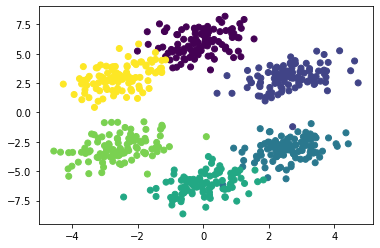

In [10]:
plt.scatter(hexagon.x, hexagon.y, c=hexagon.c)
plt.show()

In [11]:
m = 2
n = 3

train_data = np.array(hexagon[['x', 'y']])

rand = np.random.RandomState(0)

rand_min = np.percentile(hexagon.x.tolist() + hexagon.y.tolist(), 25)
rand_max = np.percentile(hexagon.x.tolist() + hexagon.y.tolist(), 75)
SOM = rand.uniform(rand_min, rand_max, (m, n, 2))

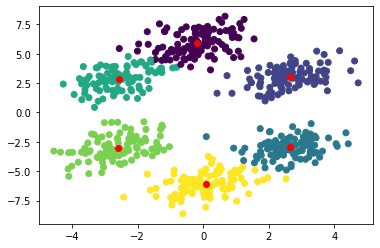

In [12]:
SOM = train_SOM(SOM, train_data, gauss, epochs=100)

dictionary  = {'x': [], 'y': []}

for l1 in SOM:
    for l2 in l1:
        dictionary['x'].append(l2[0])
        dictionary['y'].append(l2[1])
        
plt.scatter(hexagon['x'], hexagon['y'], c=classify(hexagon, SOM))
plt.scatter(dictionary['x'], dictionary['y'], c='red')
plt.show()

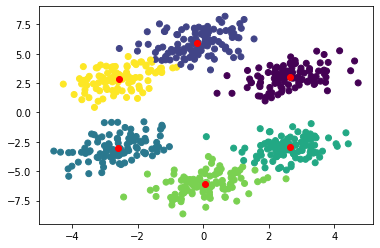

In [13]:
m = 2
n = 3

train_data = np.array(hexagon[['x', 'y']])

rand = np.random.RandomState(8555)
SOM = rand.uniform(rand_min, rand_max, (m, n, 2))
SOM = train_SOM(SOM, train_data, mexican_hat, radius_sq=0.0001, epochs=100)

dictionary = {'x': [], 'y': []}

for xd in SOM:
    for xdd in xd:
        dictionary['x'].append(xdd[0])
        dictionary['y'].append(xdd[1])
        
plt.scatter(hexagon['x'], hexagon['y'], c=classify(hexagon, SOM))
plt.scatter(dictionary['x'], dictionary['y'], c='red')
plt.show()

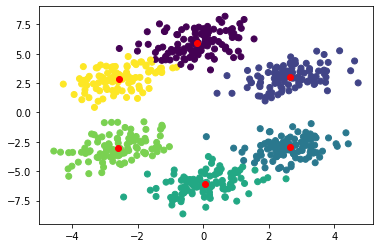

In [20]:
m = 6
n = 1

train_data = np.array(hexagon[['x', 'y']])

rand = np.random.RandomState(8555)
SOM = rand.uniform(rand_min, rand_max, (m, n, 2))
SOM = train_SOM(SOM, train_data, mexican_hat, radius_sq=0.0001, epochs=100)

dictionary = {'x': [], 'y': []}

for xd in SOM:
    for xdd in xd:
        dictionary['x'].append(xdd[0])
        dictionary['y'].append(xdd[1])
        
plt.scatter(hexagon['x'], hexagon['y'], c=classify(hexagon, SOM))
plt.scatter(dictionary['x'], dictionary['y'], c='red')
plt.show()

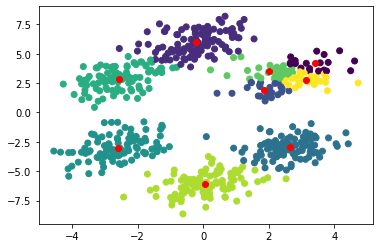

In [35]:
# zmiana szerokosci sasiedztwa

m = 3
n = 3

train_data = np.array(hexagon[['x', 'y']])

rand = np.random.RandomState(8555)
SOM = rand.uniform(rand_min, rand_max, (m, n, 2))
SOM = train_SOM(SOM, train_data, gauss, radius_sq=0.0001, epochs=100)

dictionary = {'x': [], 'y': []}

for xd in SOM:
    for xdd in xd:
        dictionary['x'].append(xdd[0])
        dictionary['y'].append(xdd[1])
        
plt.scatter(hexagon['x'], hexagon['y'], c=classify(hexagon, SOM))
plt.scatter(dictionary['x'], dictionary['y'], c='red')
plt.show()

# Cube

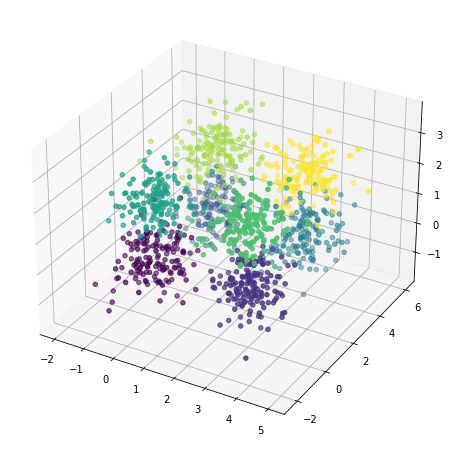

In [14]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(8, 8)

ax.scatter3D(cube.x, cube.y, cube.z, c=cube.c)

In [15]:
m = 2
n = 4

train_data = np.array(cube[['x', 'y', 'z']])

rand = np.random.RandomState(0)
rand_min = np.percentile(cube.x.tolist() + cube.y.tolist() + cube.z.tolist(), 25)
rand_max = np.percentile(cube.x.tolist() + cube.y.tolist() + cube.z.tolist(), 75)
SOM = rand.uniform(rand_min, rand_max, (m, n, 3))

SOM = train_SOM(SOM, train_data, gauss, epochs=100)

dictionary = {'x': [], 'y': [], 'z': []}
for l1 in SOM:
    for l2 in l1:
        dictionary['x'].append(l2[0])
        dictionary['y'].append(l2[1])
        dictionary['z'].append(l2[2])

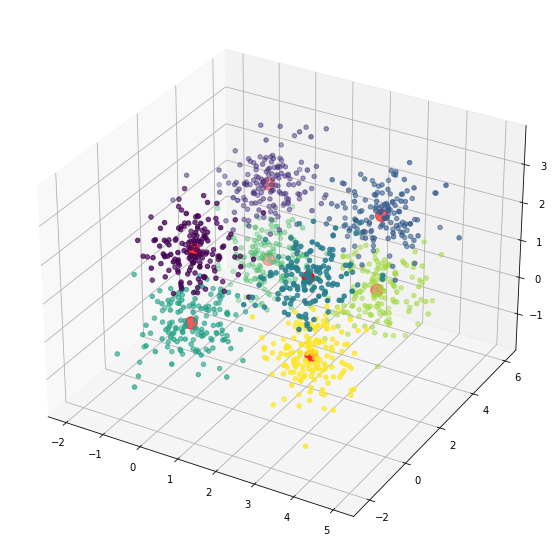

In [16]:
from mpl_toolkits import mplot3d

%matplotlib inline

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

# Data for three-dimensional scattered points

zdata = cube['z']
xdata = cube['x']
ydata = cube['y']

ax.scatter3D(xdata, ydata, zdata, c=classify3d(cube, SOM))

zdata = dictionary['z']
xdata = dictionary['x']
ydata = dictionary['y']
ax.scatter3D(xdata, ydata, zdata, c='red', s=150)

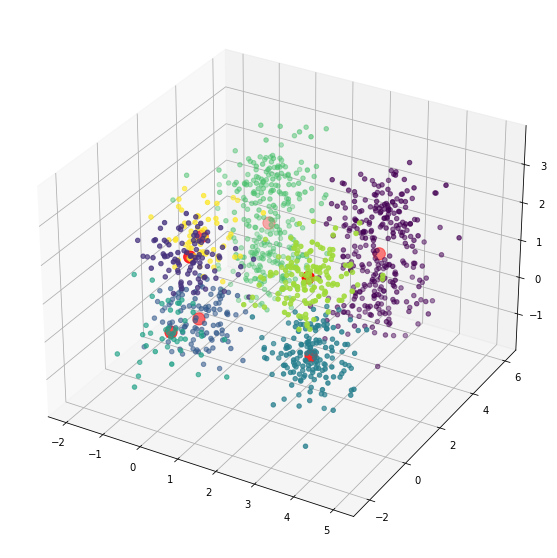

In [17]:
m = 2
n = 4

train_data = np.array(cube[['x', 'y', 'z']])

rand = np.random.RandomState(42)
SOM = rand.randint(rand_min, rand_max, (m, n, 3)).astype(float)

SOM = train_SOM(SOM, train_data, mexican_hat, radius_sq=0.0001, epochs=100)


dictionary = {'x': [], 'y': [], 'z': []}

for l1 in SOM:
    for l2 in l1:
        dictionary['x'].append(l2[0])
        dictionary['y'].append(l2[1])
        dictionary['z'].append(l2[2])
        
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

zdata = cube['z']
xdata = cube['x']
ydata = cube['y']

ax.scatter3D(xdata, ydata, zdata, c=classify3d(cube, SOM))

zdata = dictionary['z']
xdata = dictionary['x']
ydata = dictionary['y']
ax.scatter3D(xdata, ydata, zdata, c='red', s=150)